In [2]:
import numpy as np 
import matplotlib.pyplot as plt 
import scipy.io as sp
import pandas as pd
from datetime import datetime, timedelta
import scipy as spy
from scipy import signal
x =np.array([0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

def dft(x):

   
     


    K = int(len(x)/2 +1) # number of frequency points 
    K_it = np.linspace(0,9, 10)
    fax = np.linspace(0,np.pi, K) # frequency axis in radians 
    n = np.linspace(0, len(x)-1, len(x)) # vector of time series indices (starting with 0)

    # c = np.empty([16])
    # s = np.empty([16])
    re = np.empty([K])
    im = np.empty([K])
    for k,ff in enumerate(fax):
    
        c = np.cos(ff*n)
        s = np.sin(ff*n)
        re[k] = np.sum(x*c)
        im[k] = np.sum(x*s)
        
    X = re + im*(1j) # complex spectrum 
    print(re)
    print(im)
    return X
    


In [18]:
X = dft(x)

[ 2.00000000e+00  1.11022302e-16 -1.41421356e+00 -2.22044605e-16
  1.22464680e-16 -2.22044605e-16  1.41421356e+00  8.32667268e-16
 -2.00000000e+00]
[ 0.00000000e+00  1.84775907e+00  1.11022302e-16 -7.65366865e-01
  0.00000000e+00 -7.65366865e-01 -1.11022302e-15  1.84775907e+00
  9.79717439e-16]


Problem 1 :

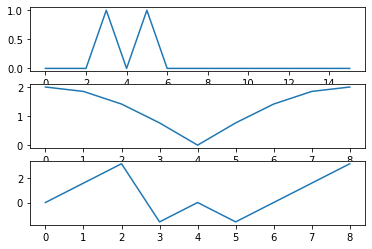

In [19]:
fig, (ax1, ax2, ax3) = plt.subplots(3)
ax1.plot(np.abs(x)) #plot the time series n, x
ax2.plot( np.abs(X)) #plot the amplitude 
ax3.plot(np.angle(X)) #plot the phase




# Problem 2 : 

Now compute the frequency spectrum using fft. Plot with a
correct frequency axis in radians. For the output of fft describe the
relationship between amplitudes that are ‘mirrored’ above and below
the Nyquist frequency. Also for the output of fft describe the
relationship between phases that are ‘folded’ above and below the
Nyquist frequency. Note that Figure 3.4 from text may help.
Finally, compare and describe the differences between the output of
fft and dft (part 1)?

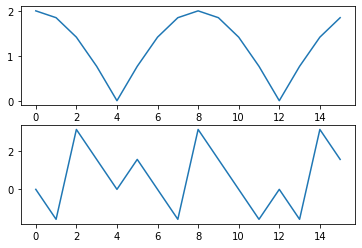

In [9]:
X = np.fft.fft(x)
fig, (ax1, ax2) = plt.subplots(2)
ax1.plot(np.abs(X)) #plot the amplitude using the fft built in numpy function 
ax2.plot(np.angle(X)) #plot the phase

Answers to problem 2: 
The difference between fft and the dft function are apparent in the phase graphs for each as well as the range of values used in the amplitude sharts. The dft value on ranged from 0 to the length of the nyquist frequency where as the ft function provided values for the enitre length of the array. 

Problem 3 :

Pad the vector x with 4080 trailing zeros such that the time
series is now 4096 (2^12) samples long. Run dft.m and fft and see
how much computational time the transforms take. Use tic and toc
prior to the function calls to see how long the processing takes.
Note: your processor time will depend upon the computer used, but
write down the times anyways and make note of which function is more
efficient. (For

In [15]:

import time 
y = np.zeros((4080,), dtype=int)
x = np.append(x,y) #create the array with 408- trailing zeros 

t = time.time() # start the clock



X = dft(x)
elapsed = time.time() - t
print(elapsed) # this is the time it takes to run the dft fuction 

t2= time.time() #Start new clock
X2 = np.fft.fft(x)
elapsed2 = time.time()-t2
print(elapsed2) # time it takes to run the fft 

[ 2.          1.99996     1.99983999 ... -1.99983999 -1.99996
 -2.        ]
[0.00000000e+00 1.22717549e-02 2.45429611e-02 ... 2.45429611e-02
 1.22717549e-02 9.79717439e-16]
0.21725201606750488
0.0003991127014160156


Problem 4:

Read in whistle_crop.mat and plot both its time series in one
panel and its amplitude spectrum in another. Crop the frequency
domain between 0 and 10,000 Hz using xlim. The sample rate of the
whistle data is Fs = 44100 Hz. Hint: given the length of the time
series you will definitely want to use fft (not dft!). Make sure the
independent axes are properly indicated in units of seconds and Hz
for the time domain and spectral domain respectively. Note: A
significant challenge here is to get the frequency axis exactly
correct. Demonstrate that you’ve done it correctly by providing the
(highest) frequency value for the (last) sample outputted by fft.


dict_keys(['__header__', '__version__', '__globals__', 'Fs', 'data'])
(0.8351440429687501-4.4289658746032856e-17j)


/Users/spencerwilbur/.conda/envs/MyEnv/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1333: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


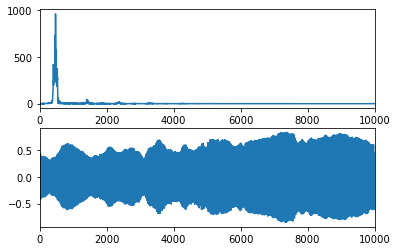

In [3]:
data = sp.loadmat('./whistle_crop.mat')
print(data.keys())
t = data['data']
t = t.ravel()
Fs = data['Fs']
W = np.fft.fft(t) # use fft function on time series 
T = np.fft.ifft(W) #use fft.ifft on W frequency to convert to time series domain


fig, (ax1, ax2) = plt.subplots(2)
ax1.set_xlim(0,10000)
#ax1.annotate('local max', xy= (xmax,Wmax), xytext=(xmax, Wmax + 1), arrowprops=dict(facecolor='black'),)
ax1.plot(np.abs(W))
ax2.set_xlim(0,10000)
ax2.plot(T)

print(max(T))


Answer to question 4: The highest frequency provided by the domain freequency when using xlimit is 10,000 based on the xlim parameter but this is representing the Nyquist frequency which could also be used as the x lim to provide the same graph. 

Problem 5:



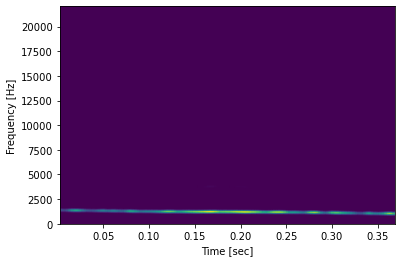

In [32]:
f, t, Sxx = signal.spectrogram(t, Fs, window = ('tukey', 256),nfft = 1024,  noverlap = int(.5))
f = f.ravel()
plt.pcolormesh(t, f, Sxx, shading='gouraud')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

Answer to Question 5: 

Based on the spectorgram the whistle is appears to be stationary for the ost part. It does have a slight declination towards lower frequencies over time but it seems pretty constant to me. 